因子好用么

In [3]:
#因为是新建的notebook
#所以重新导入get_factor_values
from jqfactor import get_factor_values
#导入平台内置的因子分析函数
from jqfactor import analyze_factor
#导入datetime，为了一会儿方便
import datetime

In [11]:
#通过第5章中的思路
#选出几只股票，做成列表备用
portfolio = ['600519.XSHG',
            '600009.XSHG',
            '601688.XSHG',
            '601166.XSHG',
            '601628.XSHG',
            '600196.XSHG',
            '600855.XSHG',
            '601899.XSHG',
            '601318.XSHG',
            '603183.XSHG']

In [5]:
#使用datetime获取当日的日期
today = datetime.date.today()
#把日期的格式转换为需要传入参数的格式
#作为截止日期
end_date = '%s-%s-%s'%(today.year, today.month, today.day)
#使用timedelta找到500天前的日期
start_date = today - datetime.timedelta(days = 500)
#检查是否成功
print(start_date, end_date)

2018-12-10 2020-4-23


In [8]:
#使用get_factor_values获取股票成交量的5日指数移动平均
#股票池参数设置为我们选出的股票
#因子参数设置为“VEMA5”，是平台提供的成交量5日移动平均因子
#起止日期设置为我们计算好的起止日期
factor_vema5 = get_factor_values(securities = portfolio,
                                     factors = ['VEMA5'],
                                 start_date = start_date,
                                     end_date = end_date,
                                     )['VEMA5']
#使用analyze_factor函数进行因子分析
#weight_method参数设置为使用市值“mktcap”来加权计算分位数
#universe参数就设为我们选好的股票池就好
#分位数quantiles设为5（默认值）
#计算收益的周期periods参数分别为1天、5天，和10天
far = analyze_factor(factor=factor_vema5, 
                     start_date= start_date, 
                     end_date= end_date, 
                     weight_method='mktcap', 
                     universe = portfolio, 
                     quantiles=5, 
                     periods=(1,5,10))

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:155: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"


In [9]:
#查看因子值5个分位对应的3个周期的收益
far.mean_return_std_by_quantile

,period_1,period_5,period_10
factor_quantile,,,
1,0.000766,0.000330,0.000227
2,0.000863,0.000359,0.000270
3,0.001273,0.000532,0.000400
4,0.000674,0.000306,0.000209
5,0.000930,0.000431,0.000302


分位数统计


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,2.673041e+05,5.462997e+06,1.164561e+06,9.191613e+05,662,22.222222
2,1.008068e+06,1.756855e+07,4.413517e+06,2.861111e+06,662,22.222222
3,2.648931e+06,3.020917e+07,1.219260e+07,4.639523e+06,331,11.111111
4,6.868017e+06,5.460606e+07,2.350035e+07,9.291225e+06,662,22.222222
5,1.690484e+07,2.954431e+08,8.363240e+07,4.213471e+07,662,22.222222



-------------------------

收益分析


,period_1,period_5,period_10
Ann. alpha,-0.084,-0.091,-0.104
beta,0.909,1.014,1.024
Mean Period Wise Return Top Quantile (bps),5.252,5.348,5.769
Mean Period Wise Return Bottom Quantile (bps),24.623,24.220,24.303
Mean Period Wise Spread (bps),-19.371,-19.474,-19.412


<Figure size 432x288 with 0 Axes>

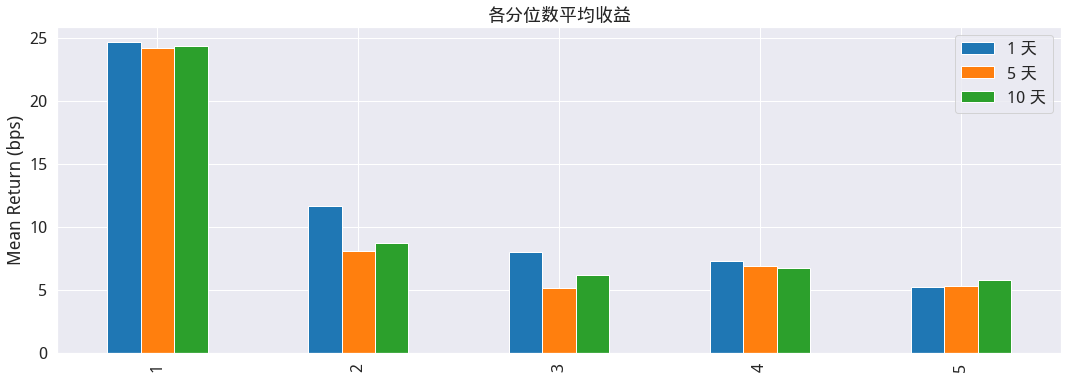

<Figure size 432x288 with 0 Axes>

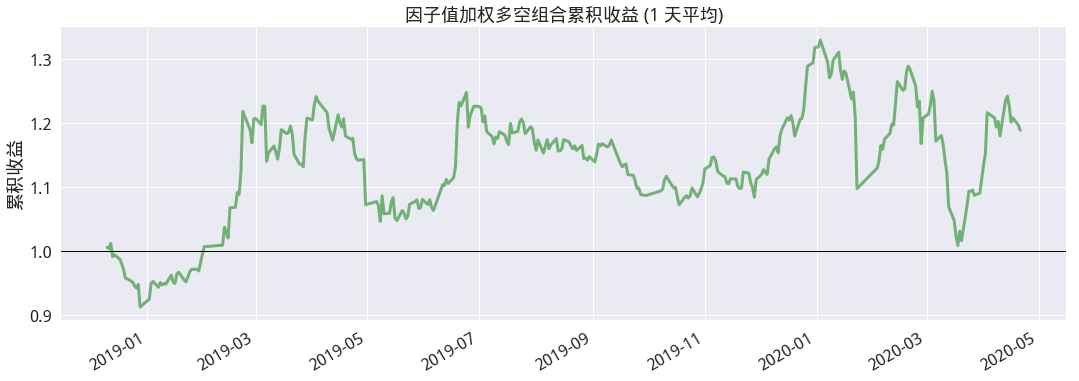

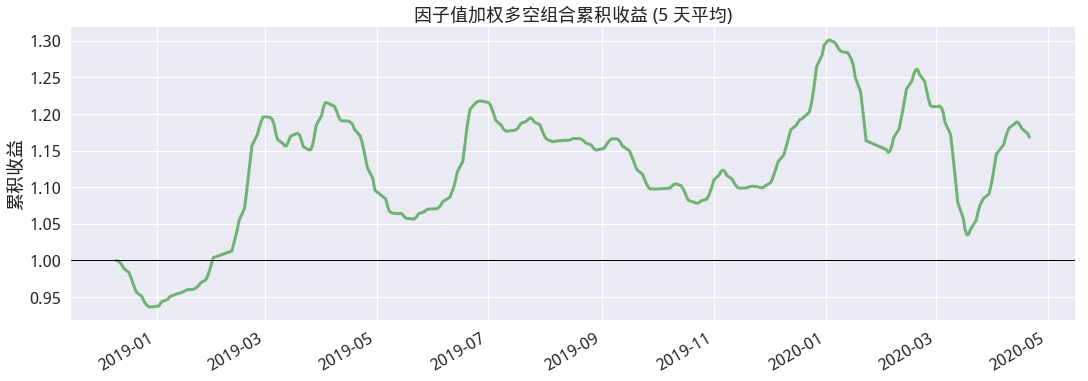

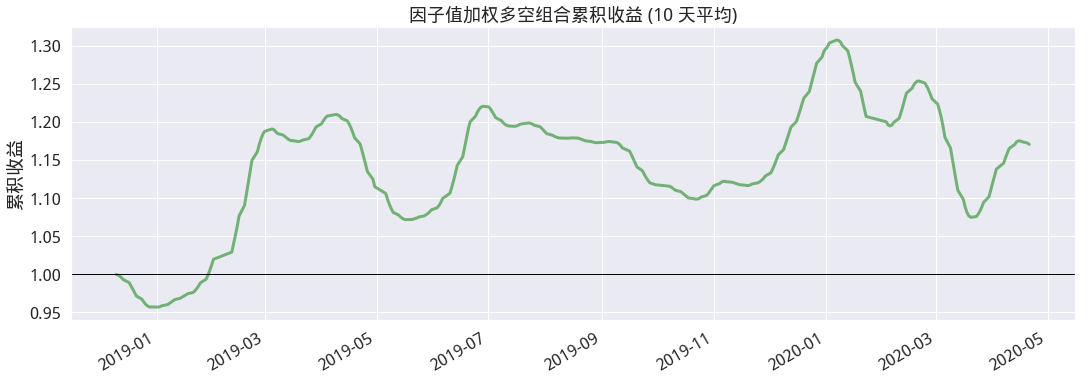

<Figure size 432x288 with 0 Axes>

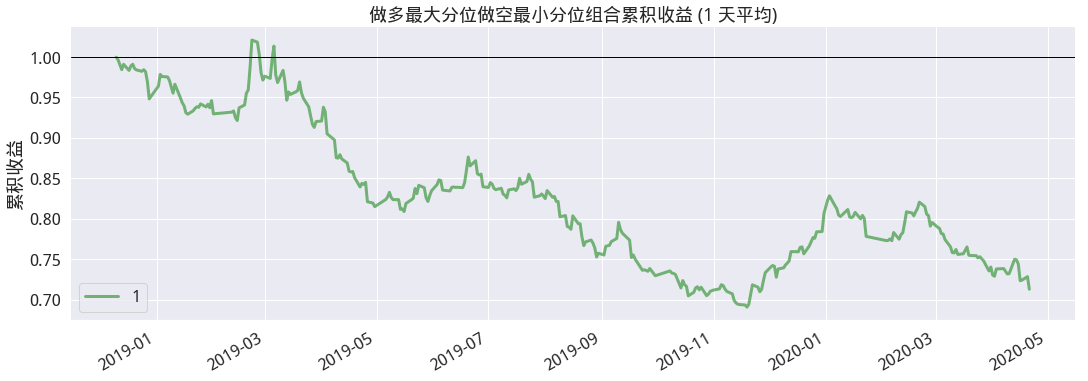

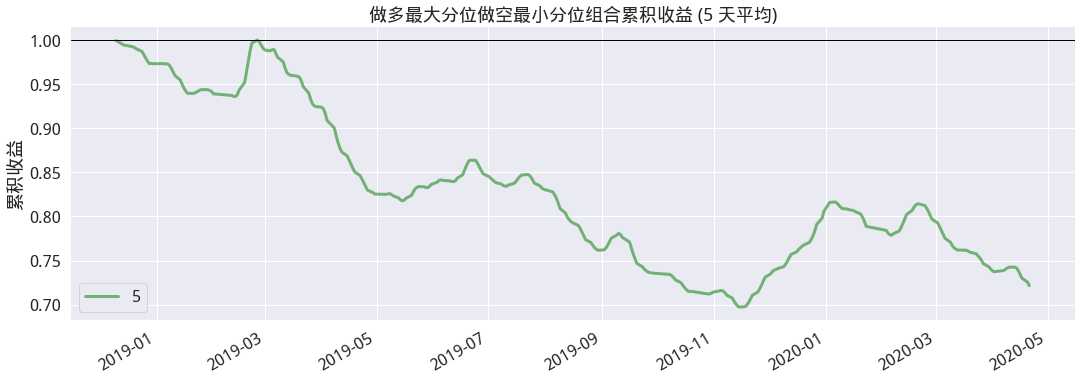

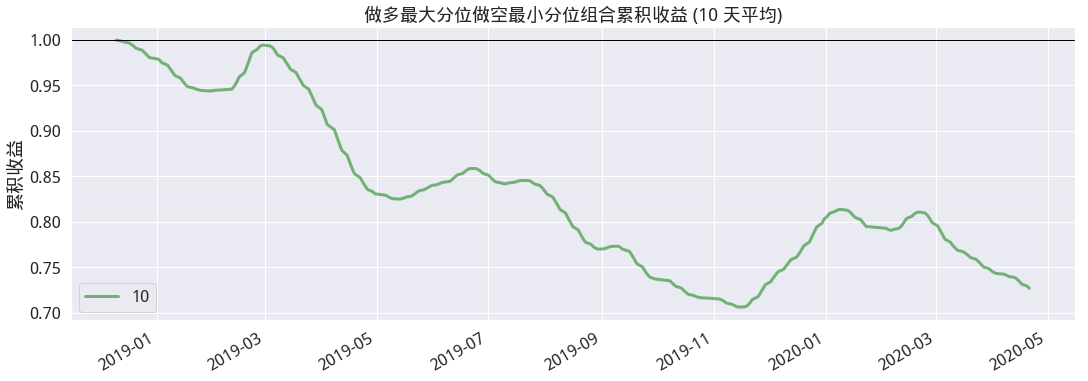

<Figure size 432x288 with 0 Axes>

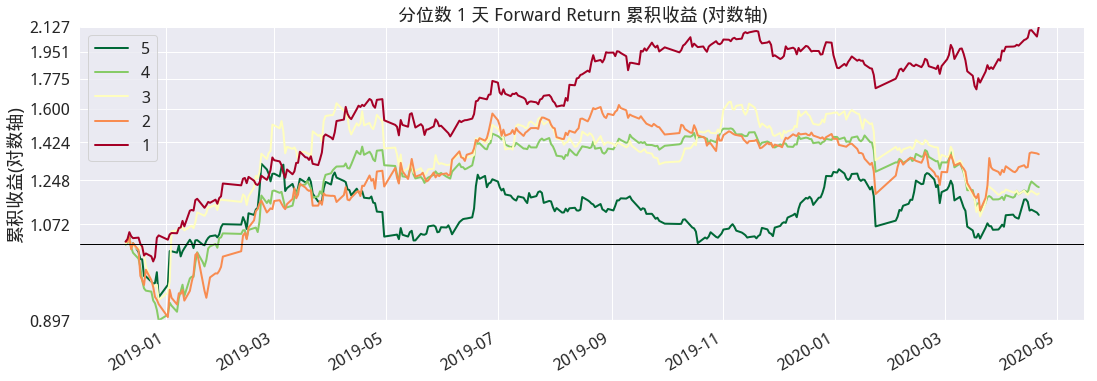

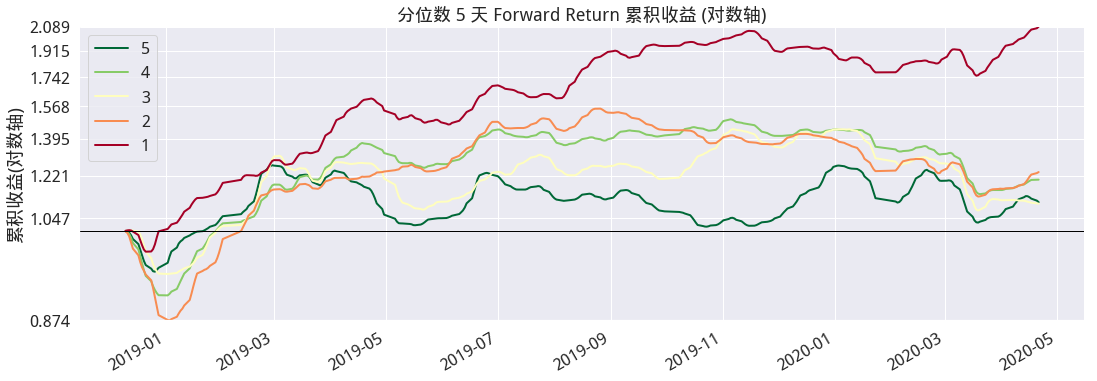

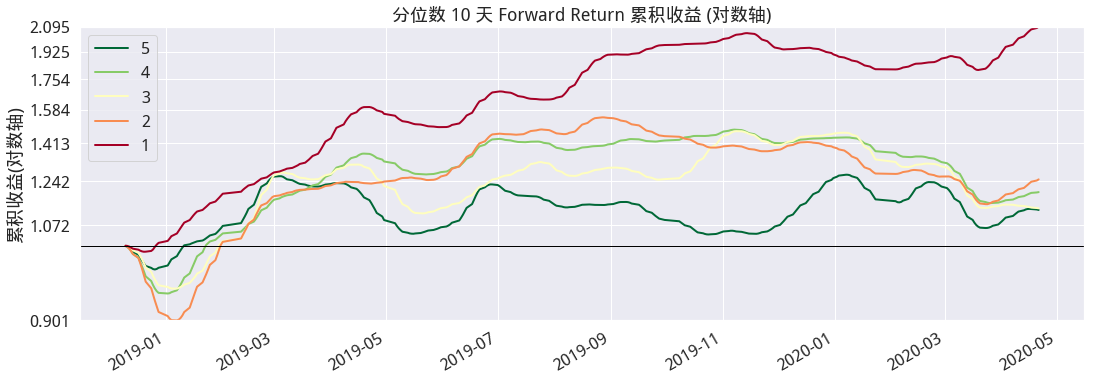

<Figure size 432x288 with 0 Axes>

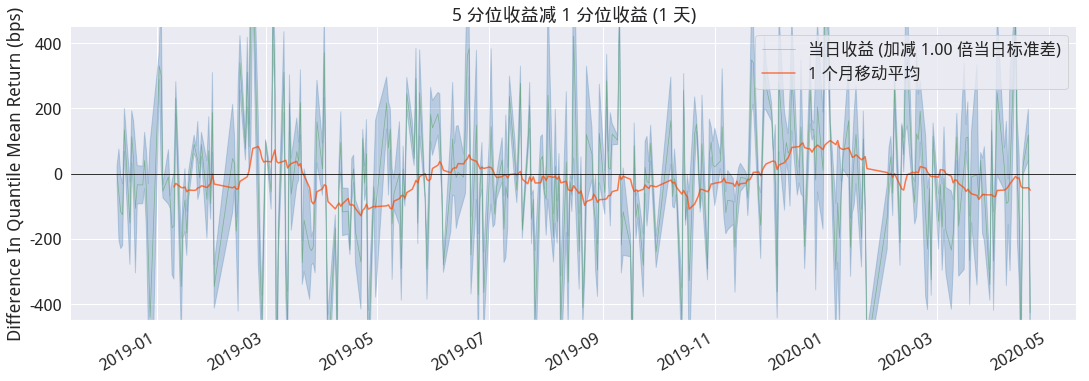

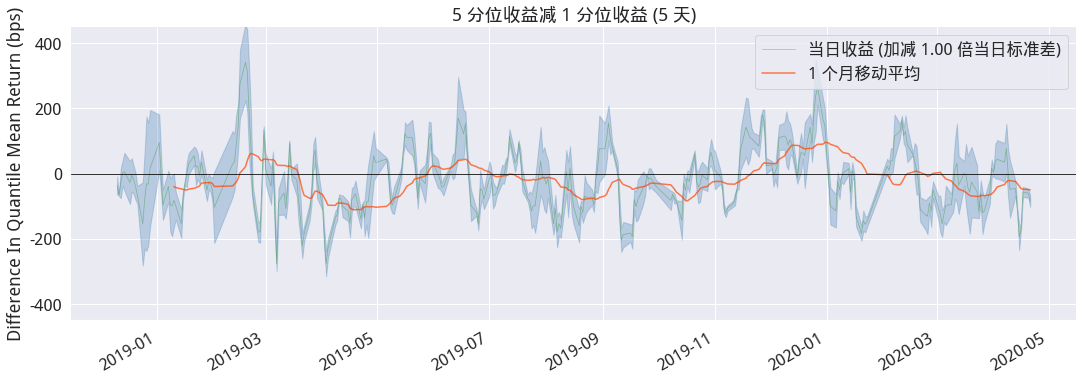

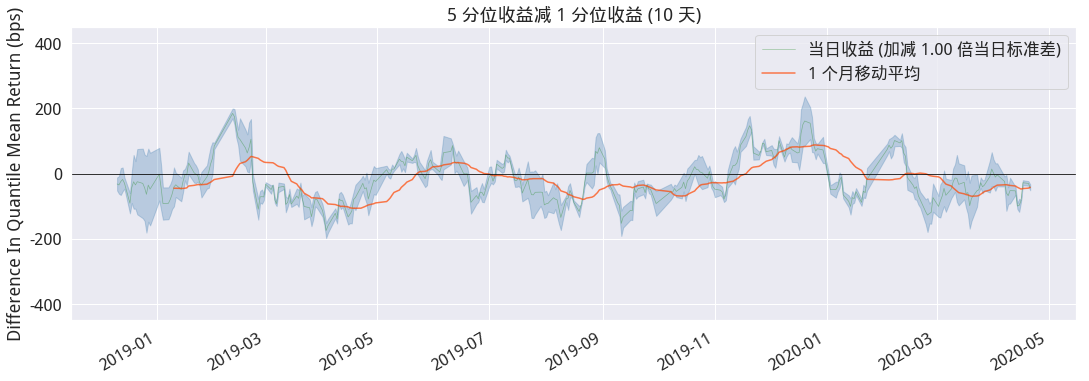


-------------------------

IC 分析


,period_1,period_5,period_10
IC Mean,-0.023,-0.083,-0.122
IC Std.,0.398,0.420,0.427
IR,-0.059,-0.198,-0.286
t-stat(IC),-1.068,-3.597,-5.197
p-value(IC),0.286,0.000,0.000
IC Skew,0.085,0.174,0.277
IC Kurtosis,-0.574,-0.804,-0.766


<Figure size 432x288 with 0 Axes>

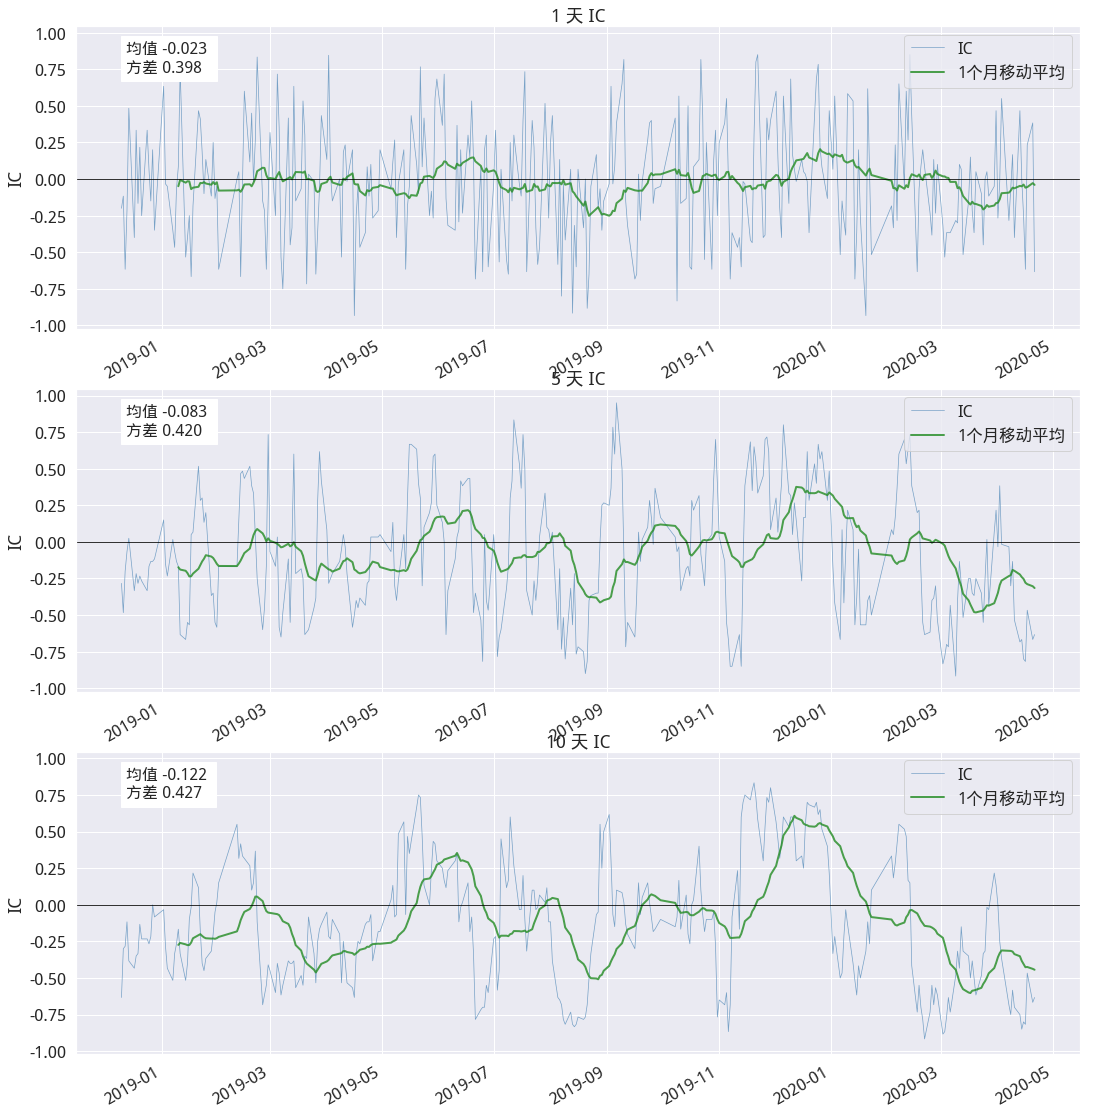

<Figure size 432x288 with 0 Axes>

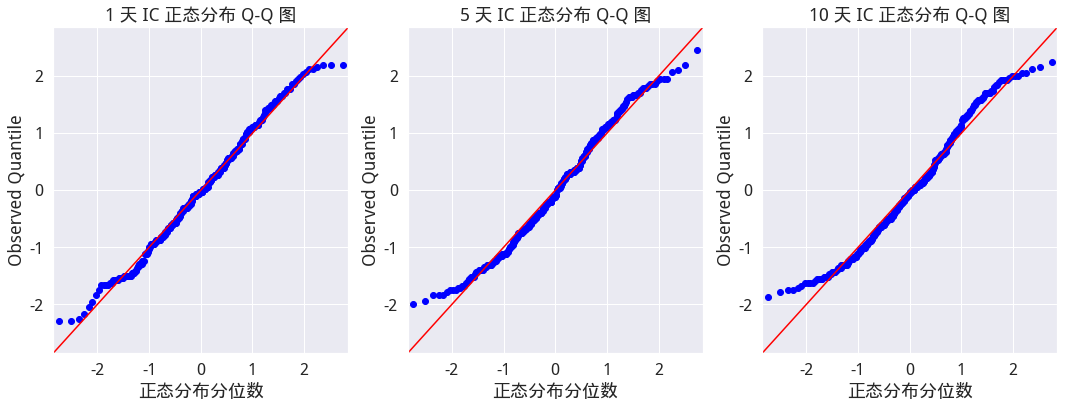

<Figure size 432x288 with 0 Axes>

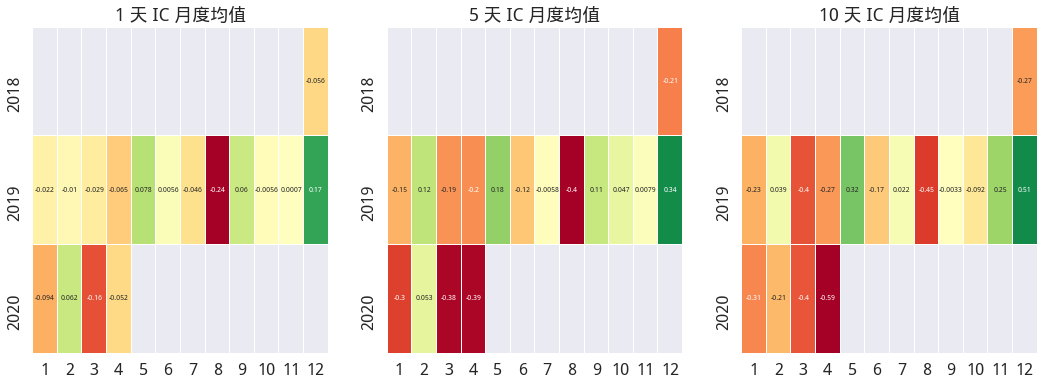


-------------------------

换手率分析


,period_1,period_10,period_5
Quantile 1 Mean Turnover,0.029,0.097,0.078
Quantile 2 Mean Turnover,0.064,0.176,0.137
Quantile 3 Mean Turnover,0.124,0.340,0.267
Quantile 4 Mean Turnover,0.035,0.156,0.112
Quantile 5 Mean Turnover,0.005,0.014,0.008


,period_1,period_5,period_10
Mean Factor Rank Autocorrelation,0.992,0.978,0.969


<Figure size 432x288 with 0 Axes>

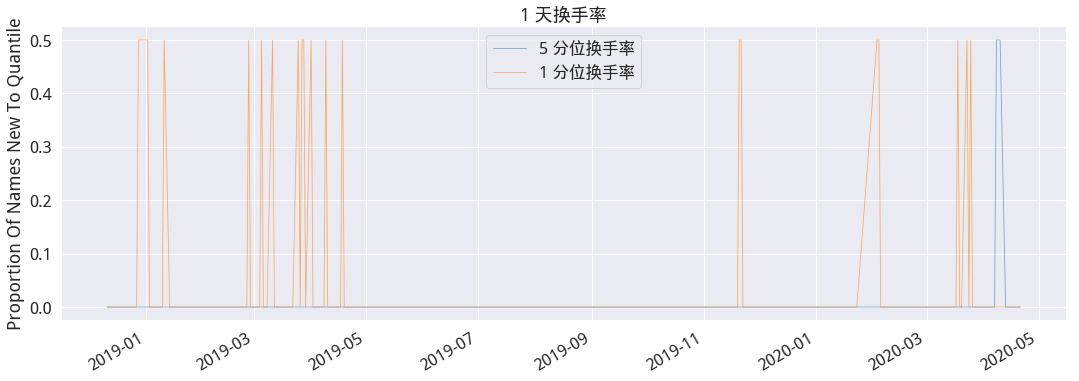

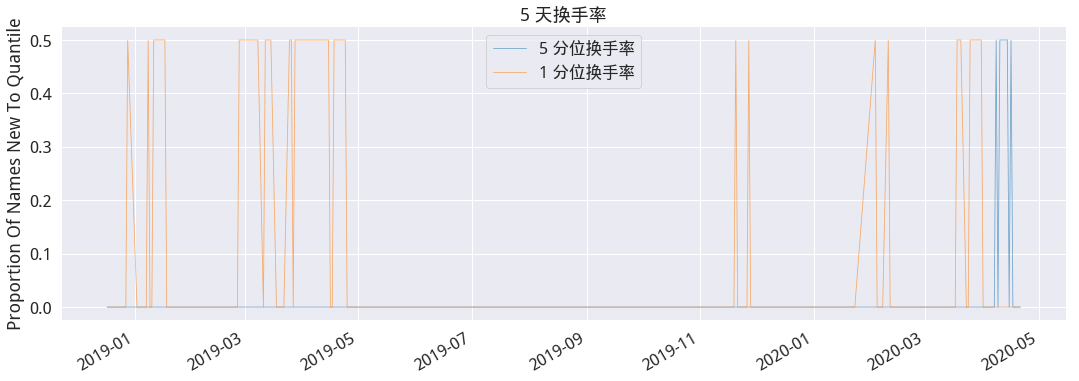

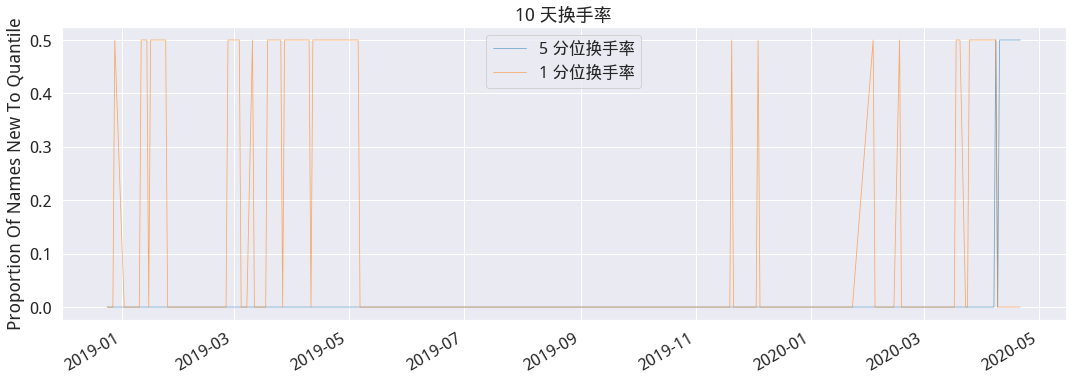

<Figure size 432x288 with 0 Axes>

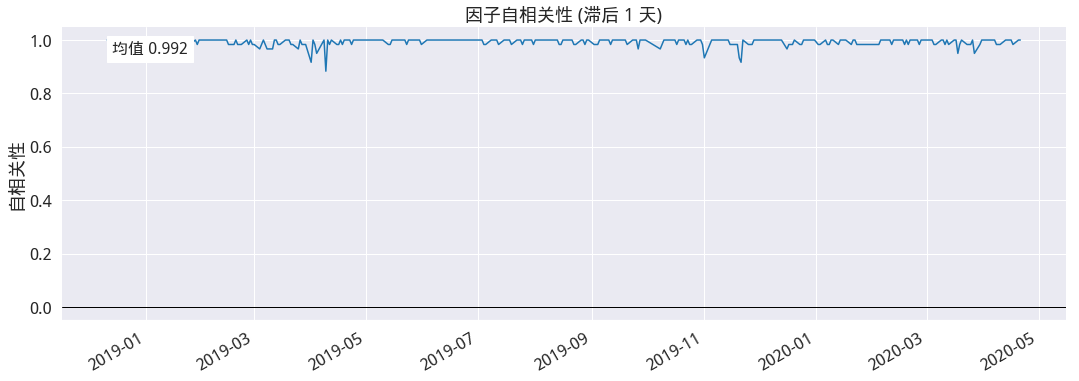

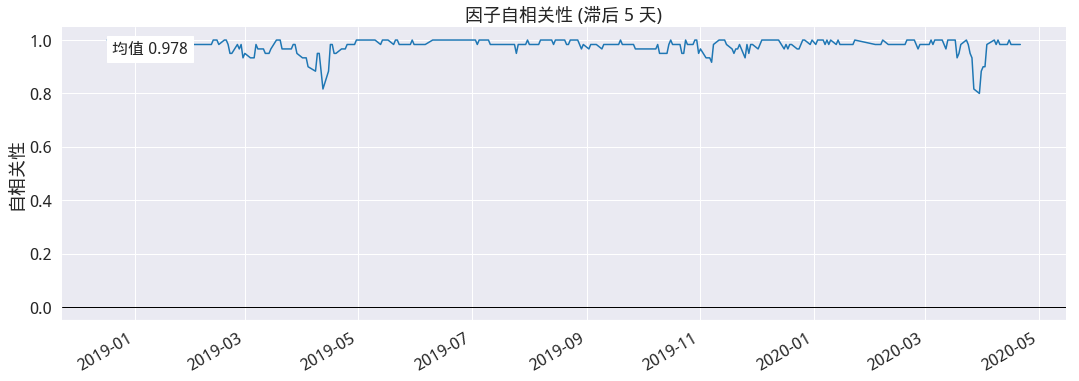

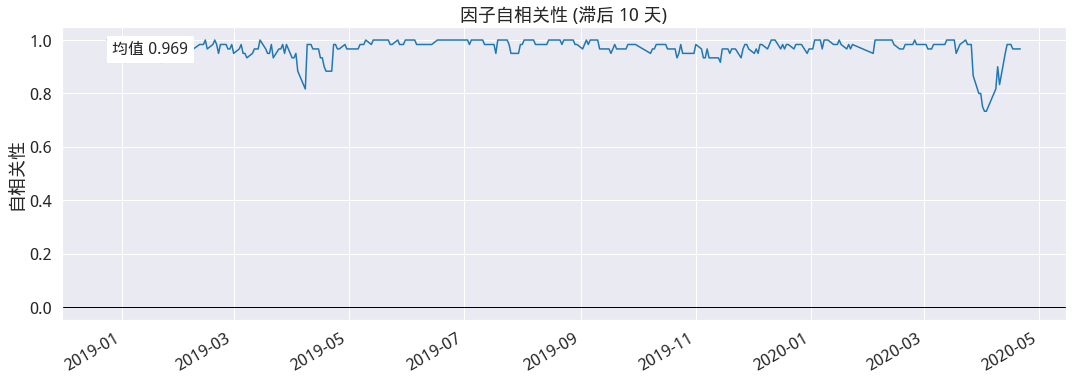


-------------------------



<Figure size 432x288 with 0 Axes>

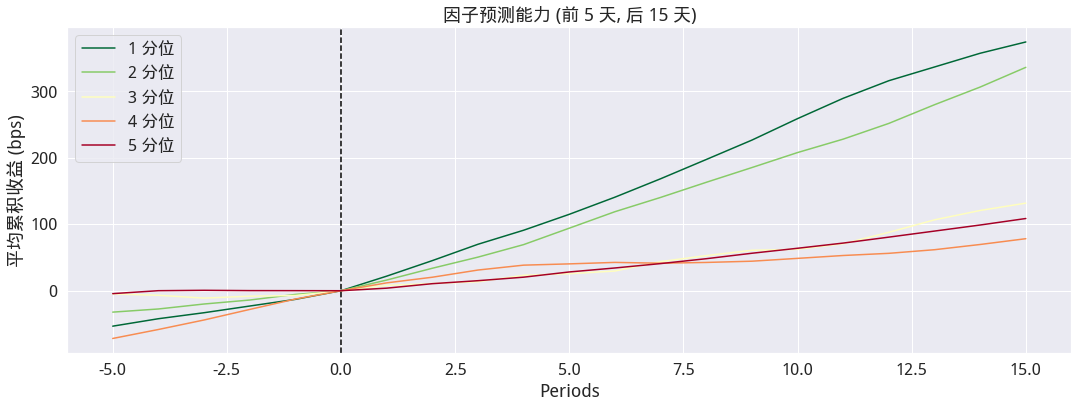

In [11]:
#使用create_full_tear_sheet来获取全部的因子分析结果
#这里demeaned参数设置为False，意思是不实用超额收益来进行计算
#group_adjust设置为False，意思是不使用行业中性化来计算收益
#by_group设置为False，意思是不按照行业展示
#turnover_periods是调仓周期，这里设置为None
#avgretplot参数设置的是因子预测的天数
#（5，15）是指向前预测5天，向后预测15天
#std_bar参数的意思是是否显示标准差，这里我们设置为False
far.create_full_tear_sheet(demeaned=False, 
                           group_adjust=False, 
                           by_group=False, 
                           turnover_periods=None, 
                           avgretplot=(5, 15), 
                           std_bar=False)